# Classification with a Quantum circuit

This demo uses the MachineLearning library to "train" a quantum circuit to classify a 2D dataset in two categories.

In [1]:
import qsharp

Preparing Q# environment...
.

In [2]:
qsharp.reload()

Reloading workspace.

In [3]:
from Test.MachineLearning import TrainHalfMoonModel, ValidateHalfMoonModel, ClassifyHalfMoonModel

## Load data

Load the Half Moons dataset

In [4]:
import json
with open('data/half_moons.json') as f:
    data = json.load(f)

## Train model

In [5]:
parameter_starting_points = [[1.7,1.17,2.51,4.18,1.73,1.39,0.44,0.42]]

In [6]:
# "Train" model, aka find optimal parameters and bias
(parameters, bias) = TrainHalfMoonModel.simulate(
    trainingVectors=data['TrainingData']['Features'],
    trainingLabels=data['TrainingData']['Labels'],
    initialParameters=parameter_starting_points
)
parameters, bias

Ready to train.
  Beginning training at start point #0...
    Pre-encoding samples...
    Beginning epoch 1.
        Beginning minibatch 0 of 2.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample 2...
      Estimating gradient at sample 3...
      Estimating gradient at sample 4...
      Estimating gradient at sample 5...
      Estimating gradient at sample 6...
      Estimating gradient at sample 7...
      Estimating gradient at sample 8...
      Estimating gradient at sample 9...
      Estimating gradient at sample 10...
      Estimating gradient at sample 11...
      Estimating gradient at sample 12...
      Estimating gradient at sample 13...
      Estimating gradient at sample 14...
            Observed good parameter update... estimating and possibly committing.
        Beginning minibatch 1 of 2.
      Estimating gradient at sample 0...
      Estimating gradient at sample 1...
      Estimating gradient at sample

([1.7, 1.17, 2.51, 4.18, 1.73, 1.39, 0.44, 0.42], -0.31176392667433467)

In [7]:
# Validate the model works by calculating the miss rate
miss_rate = ValidateHalfMoonModel.simulate(
    validationVectors=data['ValidationData']['Features'],
    validationLabels=data['ValidationData']['Labels'],
    parameters=parameters, bias=bias
)
miss_rate

0.13333333333333333

In [8]:
# Classify validation data
actual_labels = data['ValidationData']['Labels']
classified_labels = ClassifyHalfMoonModel.simulate(
    samples=data['ValidationData']['Features'],
    parameters=parameters, bias=bias,
    tolerance=0.005, nMeasurements=10_000
)

## Plot data

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import matplotlib.cm as cmx
import seaborn as sns
sns.set_theme(style="darkgrid")

In [9]:
# Label cases: actual vs classified
cases = [(0, 0), (0, 1), (1, 1), (1, 0)]

In [10]:
markers = [
    '.' if actual == classified else 'x'
    for (actual, classified) in cases
]

In [12]:
colormap = cmx.ScalarMappable(mplcolors.Normalize(vmin=0, vmax=len(cases) - 1))
colors = [colormap.to_rgba(idx_case) for (idx_case, case) in enumerate(cases)]

In [13]:
samples = np.array(data['ValidationData']['Features'])

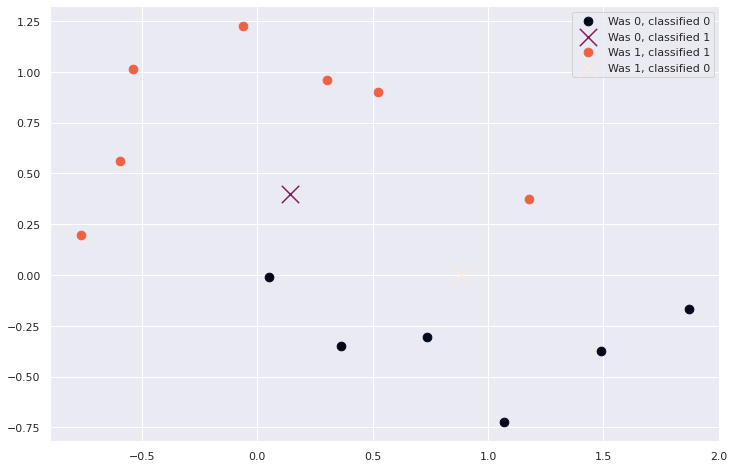

In [14]:
plt.figure(figsize=(12, 8))
for (idx_case, ((actual, classified), marker, color)) in enumerate(zip(cases, markers, colors)):
    mask = np.logical_and(np.equal(actual_labels, actual), np.equal(classified_labels, classified))
    if not np.any(mask): continue
    plt.scatter(
        samples[mask, 0], samples[mask, 1],
        label=f"Was {actual}, classified {classified}",
        marker=marker, s=300, c=[color],
    )
plt.legend()